In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Central Limit Theorem
Given any random variable $X$ with expectation(mean) $\mu$ and variance $\sigma^2$. We take $n$ amount of independent samples from that random variable(If we generate $n$ of those random variables) and take its mean denoted $\bar{X}$

$$
\bar{X} \sim \frac{\overbrace{X + X + \cdots + X + X}^{n \text{ times}}}{n}
$$

## Expectation of sample mean

$$
\begin{align}
E(\bar{X}) &= E\left(\frac{\overbrace{X + X + \cdots + X + X}^{n \text{ times}}}{n}\right)\\
&= \frac{1}{n} \times E(\overbrace{X + X + \cdots + X + X}^{n \text{ times}})\\
&= \frac{1}{n} \times (\overbrace{E(X) + E(X) + \cdots + E(X)}^{n \text{ times}})\\
&= \frac{1}{n} \times n \times E(X)\\
&= \boxed{\mu}
\end{align}
$$

## Variance of the sample variance
$$
\begin{align}
Var(\bar{X}) & = Var\left(\frac{\overbrace{X + X + \cdots + X + X}^{n \text{ times}}}{n}\right)\\
& = \frac{1}{n^2}\times( Var(\overbrace{X + X + \cdots + X + X}^{n \text{ times}}))\\
&\text{Since each sample X is independent of each other}\\
& = \frac{1}{n^2}\times (\overbrace{Var(X) + Var(X) + \cdots + Var(X) + Var(X)}^{n \text{ times}})\\
& = \frac{1}{n^2} \times n\times Var(X)\\
& = \boxed{\frac{\sigma^2}{n}}
\end{align}
$$

the central limit theorem will state that $\bar{X}$ will follow a normal distributed curve, with mean $E(\bar{X}) = \mu$ and variance $Var(\bar{X}) = \frac{\sigma^2}{n}$


$$
\bar{X} \sim N(\mu, \frac{\sigma^2}{n})
$$

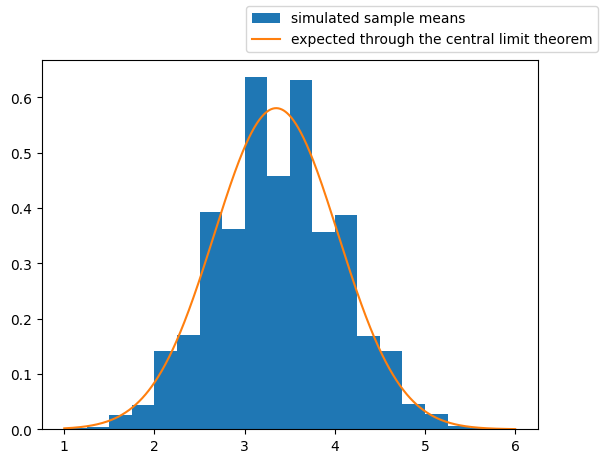

In [6]:
# In the case of discrete variables

xk = np.arange(1, 7, 1)
pk = np.array([0.4, 0.05, 0.05, 0.1, 0.1,0.3])

my_discrete_rv = stats.rv_discrete(values=(xk, pk))

# collecting n samples
runs = 10_000_000
n=10
list_of_sample_of_mean = np.mean(my_discrete_rv.rvs(size=(runs, n)), axis=1)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(list_of_sample_of_mean, label="simulated sample means", density=True, bins=20)
x_for_normal_dist = np.linspace(np.min(list_of_sample_of_mean), np.max(list_of_sample_of_mean), 1000)
my_normal_dist = stats.norm(my_discrete_rv.expect(), my_discrete_rv.std()/np.sqrt(n))
ax.plot(x_for_normal_dist,my_normal_dist.pdf(x_for_normal_dist), label="expected through the central limit theorem")
fig.legend()

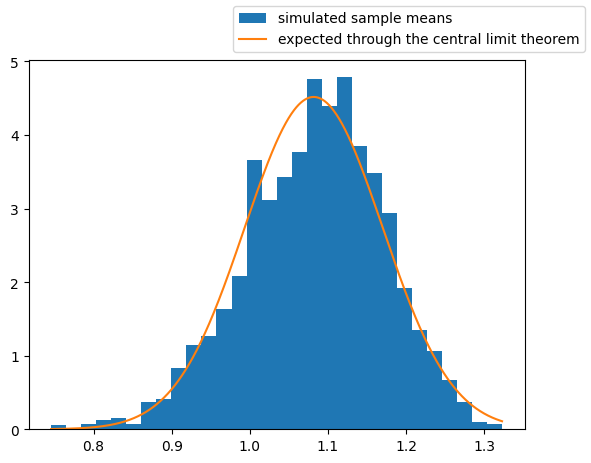

In [7]:
# In the case of continuous variables

xk = np.arange(1, 7, 1)
pk = np.array([0.4, 0.05, 0.05, 0.1, 0.1,0.3])

class custom_continuous_rv(stats.rv_continuous):
    def _pdf(self, x):
        return x*x

# collecting n samples
runs = 2_000
n=10
my_continuous_rv = custom_continuous_rv(a=0, b=3**(1/3))
list_of_sample_of_mean = np.mean(my_continuous_rv.rvs(size=(runs, n)), axis=1)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(list_of_sample_of_mean, label="simulated sample means", density=True, bins=30)
x_for_normal_dist = np.linspace(np.min(list_of_sample_of_mean), np.max(list_of_sample_of_mean), 1000)
my_normal_dist = stats.norm(my_continuous_rv.expect(), my_continuous_rv.std()/np.sqrt(n))
ax.plot(x_for_normal_dist,my_normal_dist.pdf(x_for_normal_dist), label="expected through the central limit theorem")
fig.legend()